# Case Study - Image Classification using Deep CNN in Keras.


<h1>Context<h1/>

- The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.
- The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.
- There are 6,000 images of each class.

<h2>Understand the labels:<h2/>

- airplane : 0
- automobile : 1
- bird : 2
- cat : 3
- deer : 4
- dog : 5
- frog : 6
- horse : 7
- ship : 8
- truck : 9

## Add-on:
What type of classification is this?

<h1>Problem Statement<h1/>

- Image Classification using Deep CNN in Keras and also some edge detection operation.


<h1>Import all necessary modules and load the data<h1/>

In [ ]:
# Import necessary modules.

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow

In [ ]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 10
epochs = 40
num_predictions = 20

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
# Print the shape of dataset.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
x_train[9, :, :, :].shape

(32, 32, 3)

## Highlights:
- How to select the 10th image?
- How to get the red pixels only?
- What is the shape of resulting array?

In [ ]:
y_train.shape

(50000, 1)

- The training set contains 50000 images.
- The size of each image is 32x32 pixels.
- Each image has 3 color channels.

In [ ]:
y_train[0]

array([6], dtype=uint8)

- The label of image at index = 0 is 6:"frog".

In [ ]:
label_dict =  {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}


<h2>Explore the Data<h3/>

- Understanding a dataset is part of making predictions on the data. 
- It answers some of questions like in a given data..
  - "What are the possible labels?"
  - "What is the range of pixel values for the image data?"


Label 
 Label Id: 6 
 Name: frog


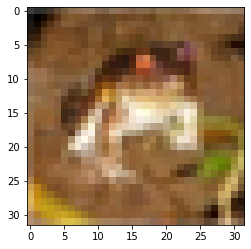

In [ ]:
i = 0
image = x_train[i]
label = y_train[i][0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label \n Label Id: {label} \n Name: {label_dict[label]}')
plt.imshow(image);

## Add-on:
- Without checking, what is the shape of `image`
- How to rewrite the print statement using `f-string`?

- The above image of a frog.
- The Label ID is 6.
- As we can see the x-axis and y-axis of image, it shows that there are 32 pixels on each directions.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


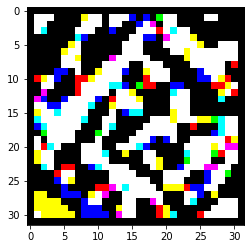

In [ ]:
sobel = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)
plt.imshow(sobel)

- As the image quality is not good, the edges are not so good. But still we can visualize that there are edges.

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
# Convert labels to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [ ]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

## Please Note:
There are many tools to one-hot encode and they differ in syntax, but the keras one is probably best implemented.
- `keras.utils.to_categorical`
- `sklearn.preprocessing.OneHotEncoder`
- `pandas get_dummies`

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
#y = [[0], [1], [2], [3]]
y = [0, 1, 2, 3]
#keras.utils.to_categorical(y)
#ohe = OneHotEncoder()
#ohe.fit_transform(y).toarray()
pd.get_dummies(y)

,0,1,2,3
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


<h1>Create the Model:<h1/>

- Convolutional input layer, 32 feature maps with a size of 5×5 and a rectifier activation function.
- Batch Normalization Layer.
- Convolutional layer, 32 feature maps with a size of 5×5 and a rectifier activation function.
- Batch Normalization layer.
- Max Pool layer with size 2×2.
- Dropout layer at 25%.
---
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization layer.
- Dropout layer at 25%.
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization layer.
- Max Pool layer with size 2×2.
- Dropout layer at 25%.
---
- GlobalMaxPooling2D layer.
- Fully connected layer with 256 units and a rectifier activation function.
- Dropout layer at 50%.
- Fully connected output layer with 10 units and a softmax activation function.


In [ ]:
# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=x_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

# Number of parameters in the CNN layers:

- ## Number of Parameters of a Conv Layer:
In a CNN, each layer has two kinds of parameters : weights and biases. The total number of parameters is just the sum of all weights and biases.

  Let’s define,

  - W_c = Number of weights of the Conv Layer.
  - B_c = Number of biases of the Conv Layer.
  - P_c = Number of parameters of the Conv Layer.
  - K = Size (width) of kernels used in the Conv Layer.
  - N = Number of kernels.
  - C = Number of channels of the input image.

    W<sub>c</sub> = K<sup>2</sup> x C x N
    
    B<sub>c</sub> = N

    P<sub>c</sub> = W<sub>c</sub> + B<sub>c</sub>


  So, we will use this formulae for our parameter calculation of first layer:
    
    model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=x_train.shape[1:]))

  So the number of parameters is given by:

  Number of weights = W<sub>c</sub> = 5<sup>2</sup> x 3 x 32 = 2400

  Number of biases = B<sub>c</sub> = 32

  Total number of parameters for this layer = P<sub>c</sub> = 2400 + 32 = 2432


  We can verify this number by looking at the model summary.

    conv2d (Conv2D)              (None, 32, 32, 32)        2432

- ## Number of Parameters of a MaxPool Layer:
There are no parameters associated with a MaxPool layer. The pool size, stride, and padding are hyperparameters.

- ## Number of Parameters of a Fully Connected (FC) Layer:
There are two kinds of fully connected layers in a CNN. The first FC layer is connected to the last Conv Layer, while later FC layers are connected to other FC layers. Let’s consider each case separately.

  - ### Case 1: Number of Parameters of a Fully Connected (FC) Layer connected to a Conv Layer:
  Let’s define,

    W_{cf} = Number of weights of a FC Layer which is connected to a Conv Layer.

    B_{cf} = Number of biases of a FC Layer which is connected to a Conv Layer.
    
    O = Size (width) of the output image of the previous Conv Layer.
    
    N = Number of kernels in the previous Conv Layer.
    
    F = Number of neurons in the FC Layer.

      - W<sub>cf</sub> = O<sup>2</sup> x N x F
    
      - B<sub>cf</sub> = F

      - P<sub>cf</sub> = W<sub>cf</sub> + B<sub>cf</sub>

    Example: The first fully connected layer of our model is connected to a Conv Layer. For this layer, O = 1 (the width and height of image after global maxpooling), N = 64 and F = 256. Therefore,

      - Number of weights = W<sub>cf</sub> = 1<sup>2</sup> x 64 x 256 = 16384

      - Number of biases = B<sub>c</sub> = 256

      - Total number of parameters for this layer = P<sub>c</sub> = 16384 + 256 = 16640

    We can verify this number by looking at the model summary.
      
            dense (Dense)                (None, 256)               16640 

  - ### Case 2: Number of Parameters of a Fully Connected (FC) Layer connected to a FC Layer
  Let’s define,

    W<sub>ff</sub> = Number of weights of a FC Layer which is connected to an FC Layer.

    B<sub>ff</sub> = Number of biases of a FC Layer which is connected to an FC Layer.
    
    P<sub>ff</sub> = Number of parameters of a FC Layer which is connected to an FC Layer.
    
    F = Number of neurons in the FC Layer.
    
    F<sub>-1</sub> = Number of neurons in the previous FC Layer.

      - W<sub>ff</sub> = F<sub>-1</sub> x F

      - B<sub>ff</sub> = F

      - P<sub>ff</sub> = W<sub>ff</sub> + B<sub>ff</sub>

    In the above equation, **F<sub>-1</sub> x F** is the total number of connection weights from neurons of the previous FC Layer the neurons of the current FC Layer. The total number of biases is the same as the number of neurons (F).

    Example: The last fully connected layer of AlexNet is connected to an FC Layer. For this layer, **F<sub>-1</sub>** = 256 and **F** = 10. Therefore,

      - Number of weights = W<sub>cf</sub> = 256 x 10 = 2560

      - Number of biases = B<sub>c</sub> = 10

      - Total number of parameters for this layer = P<sub>c</sub> = 2560 + 10 = 2570

    We can verify this number by looking at the model summary.
      
            dense_1 (Dense)              (None, 10)                2570

## Please Note:
> Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers.

https://keras.io/api/layers/activations/

<h3>Conv2D:<h3/>

- Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

<h3>Activation('relu'):<h3/>

- 'relu' stands for Rectified linear unit. It is the most widely used activation function. Chiefly implemented in hidden layers of Neural network.
- ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations. At a time only a few neurons are activated making the network sparse making it efficient and easy for computation.

<h3>MaxPooling2D:<h3/>

- The objective MaxPooling Layer is to down-sample an input representation.
- This is done to in part to help over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the number of parameters to learn.

<h3>Dropout:<h3/>

- Dropout is a technique used to improve over-fit on neural networks.
- Basically during training half of neurons on a particular layer will be deactivated. This improve generalization.
- Normally some deep learning models use Dropout on the fully connected layers, but is also possible to use dropout after the max-pooling layers, creating some kind of image noise augmentation.

<h3>Dense:<h3/>

- Dense layer implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

<h3>Softmax:<h3/>

- The softmax function is also a type of sigmoid function but is handy when we are trying to handle classification problems.
- Usually used when trying to handle multiple classes. The softmax function would squeeze the outputs for each class between 0 and 1 and would also divide by the sum of the outputs.
______________

## Add-on:
How to handle multilabel classification?

<h4>When training the network, what you want is minimize the cost by applying a algorithm of your choice. It could be SGD, AdamOptimizer, AdagradOptimizer, or something. You have to study how each algorithm works to choose what to use, but AdamOptimizer works find for most cases in general.<h4/>

In [ ]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [ ]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

## Add-on:
Which loss function to use? It depends :)

https://stackoverflow.com/questions/42081257/why-binary-crossentropy-and-categorical-crossentropy-give-different-performances

In [ ]:
# Network structure is summarized which confirms our design was implemented correctly.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

- The pixel values are in the range of 0 to 255 for each of the red, green and blue channels.

- It is good practice to work with normalized data. Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation which is 255.

- Note, the data is loaded as integers, so we must cast it to floating point values in order to perform the division.

In [ ]:
x_train = x_train.astype('float32') # Conversion to float type from integer type.
x_test = x_test.astype('float32')
x_train /= 255.0 # Division by 255
x_test /= 255.0

In [ ]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


<h2>Fit the model:<h2/>

-  We can fit this model with 40 epochs and a batch size of 32.

- A small number of epochs was chosen to quickly run the code so we can understand the concepts ahead. Normally the number of epochs would be one or two orders of magnitude larger for this problem.

Epoch 1/40
1563/1563 [==============================] - ETA: 0s - loss: 1.8571 - accuracy: 0.3172
Epoch 00001: val_loss improved from inf to 1.78368, saving model to cifar_cnn_checkpoint_01_loss1.7837.h5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.8571 - accuracy: 0.3172 - val_loss: 1.7837 - val_accuracy: 0.3775
Epoch 2/40
1559/1563 [============================>.] - ETA: 0s - loss: 1.5134 - accuracy: 0.4457
Epoch 00002: val_loss improved from 1.78368 to 1.40452, saving model to cifar_cnn_checkpoint_02_loss1.4045.h5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5129 - accuracy: 0.4459 - val_loss: 1.4045 - val_accuracy: 0.4890
Epoch 3/40
1559/1563 [============================>.] - ETA: 0s - loss: 1.3543 - accuracy: 0.5142
Epoch 00003: val_loss did not improve from 1.40452
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3540 - accuracy: 0.5143 - val_loss: 1.4316 - val_accuracy: 0.4943
Epoch 4/40
1554/1563 [===============

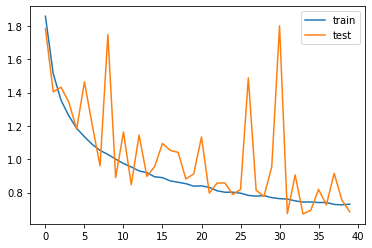

In [ ]:
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

<h2>Model Score:<h2/>

- Once the model is fit, we evaluate it on the test dataset and print out the classification accuracy

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.6853 - accuracy: 0.7838
Test loss: 0.6853188276290894
Test accuracy: 0.7838000059127808


<h3>The above score shows that the accuracy is good, as we used number of epochs = 30.
If we use more epochs and tune the hyper-parameters more then we can get some more accuracy score. As our focus on the case study was to learn about the use of CNNs for image classification, we needed to run the code thoroughly so we set number of epochs to less. <h3/>

# Summary:

<h3>In this case study we discovered how to create deep CNNs in Keras for image classification.<h3/>

After working through this case study we learned:

- About the CIFAR-10 dataset and how to load it in Keras and plot examples from the dataset.
- How to train and evaluate a Convolutional Neural Network on the problem.


## Additional Reading Material Links:

- Benefits of using pooling layers https://stats.stackexchange.com/questions/288261/why-is-max-pooling-necessary-in-convolutional-neural-networks
- Why padding? https://stats.stackexchange.com/questions/246512/convolutional-layers-to-pad-or-not-to-pad
- More CNN's   
  - https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac
- Neural Network Architectures  https://towardsdatascience.com/neural-network-architectures-156e5bad51ba 